In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

def symmetrize(matrix):
    """Symmetrize a triangular matrix."""
    return matrix + matrix.T - np.diag(matrix.diagonal())


# In this notebook, we will analyze the two body interaction within the deuteron. We operate in the realm of ab initio nuclear structure physics and
# want to especially focus on the difference of the relative harmonic oscillator basis vs the relative momentum basis. Especially the problem of 
# convergence in regards to trunctuation and the grid size will be discussed.

# test_data = pd.read_csv(r"C:\Users\Elias Enrique Hamel\Documents\TUDarmstadt\Master\NuclearStructure\code_git\comp_nuclear_structure_physics2025\Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho", sep = r"\s+", header = None, skiprows = 1)
# test_data = pd.read_csv(r"Data\RelativeHarmonicOscillator\chi2bM3A\chi2bM3A_srg0000_NMax100_LMax02_hwHO012.meho\chi2bM3A_srg0000_NMax100_LMax02_hwHO012.meho",  sep = r"\s+", header = None, skiprows = 1)
test_data = pd.read_csv(r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO010.meho\trel_NMax100_LMax02_hwHO010.meho", sep = r"\s+", header = None, skiprows = 1)

test_data = test_data.rename(columns = {0: "N", 1: "L", 2: "N'", 3:"L'", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})

test_data = test_data.loc[(test_data['J'] == 1) & (test_data['S'] == 1) & (test_data['T'] == 0) & (test_data['MT'] == 0)]
test_data = test_data.sort_values(['L',"L'"])

# save the data
test_data.to_csv("test_data.csv")


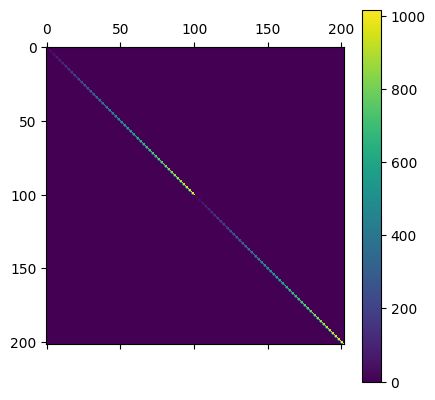

E_20 vs. E_02^T:
True
Is the Hamiltonian Hermitian after symmetrization? False
Unique N values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
Unique N' values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
Unique L values: [0 2]
Unique L' values: [0 2]


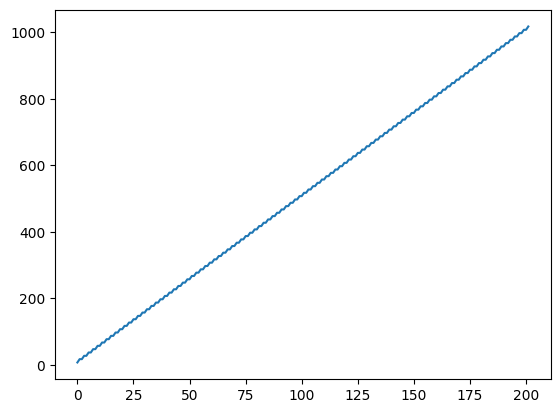

7.5


In [2]:
# Since we especially target the deuteron ground state, we filtered according to all the fixed angular momentum quantum numbers
# We will follow by creating a block diagonal matrix where the upper left inner matrix will be (L=0, L'=0), the upper right (L=0, L'=2) the lower left (L=2,L'=0) and the lower right (L=2;L'=2)


# Extract submatrices
E_00 = test_data[(test_data['L'] == 0) & (test_data["L'"] == 0)].pivot(index="N'", columns="N", values='E').fillna(0).values
E_02 = test_data[(test_data['L'] == 0) & (test_data["L'"] == 2)].pivot(index="N'", columns="N", values='E').fillna(0).values
E_20 = test_data[(test_data['L'] == 2) & (test_data["L'"] == 0)].pivot(index="N'", columns="N", values='E').fillna(0).values
E_22 = test_data[(test_data['L'] == 2) & (test_data["L'"] == 2)].pivot(index="N'", columns="N", values='E').fillna(0).values

# E_00 = symmetrize(E_00)
# E_02 = symmetrize(E_02)
# E_20 = symmetrize(E_20)
# E_22 = symmetrize(E_22)

# Create block diagonal matrix
E_matrix = np.block([[E_00, E_02], [E_20, E_22]])
E_matrix[:E_00.shape[0], E_00.shape[1]:] = E_02
E_matrix[E_00.shape[0]:, :E_00.shape[1]] = E_20

# Plot matrix
plt.matshow(E_matrix)
plt.colorbar()
plt.show()

# Validate symmetry of submatrices
print("E_20 vs. E_02^T:")
print(np.allclose(E_20, E_02.T))

# # Combine submatrices into block Hamiltonian
H = E_matrix
# Check if the Hamiltonian is Hermitian
is_hermitian = np.allclose(H, H.T)
print(f"Is the Hamiltonian Hermitian after symmetrization? {is_hermitian}")


print("Unique N values:", test_data["N"].unique())
print("Unique N' values:", test_data["N'"].unique())
print("Unique L values:", test_data["L"].unique())
print("Unique L' values:", test_data["L'"].unique())

# Since we are interested in the convergence of the relative harmonic oscillator basis, we will plot the eigenvalues of the matrix as a function of the number of basis states
# included in the calculation. We will start with a low number of basis states and increase the number of basis states until we reach a convergence.

# Solve the eigenvalue problem for the entire untrunctated matrix
eigenvalues, eigenvectors = np.linalg.eig(E_matrix)
eigenvalues = np.sort(eigenvalues)
plt.plot(np.abs(eigenvalues))
plt.show()

# print the smallest eigenvalue
print(eigenvalues[0])
#print(eigenvalues)




[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.14996344e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.65998537e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.98562488e+03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.06737916e+03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.14996344e+03]]


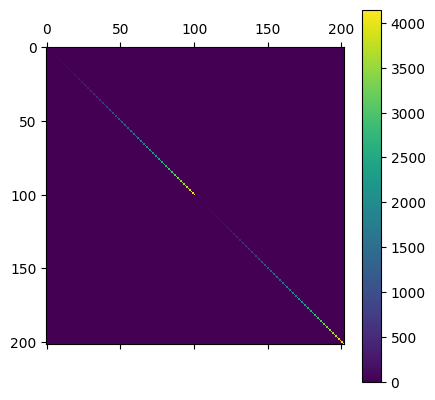

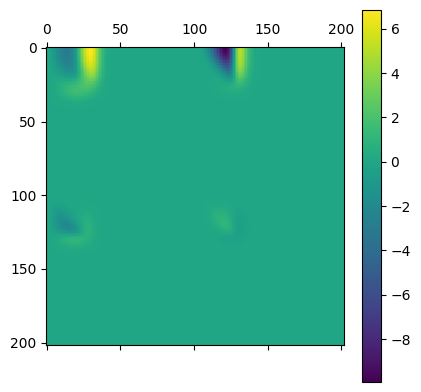

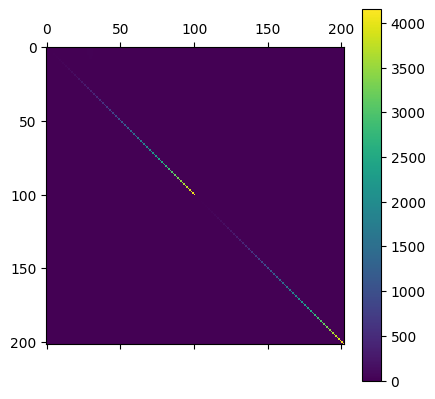

Is the Hamiltonian Hermitian after symmetrization? False
True


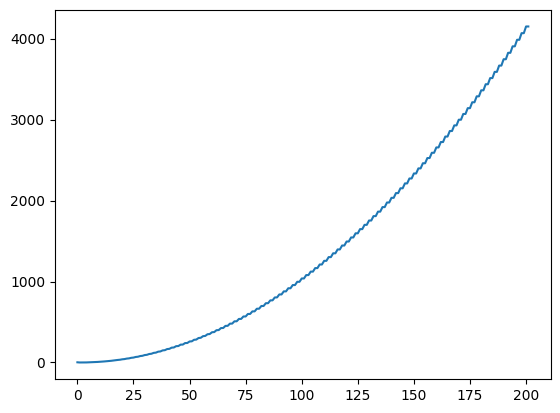

-2.215705572230761
[-2.21570557e+00  0.00000000e+00  0.00000000e+00  4.15010922e-01
  5.91038593e-01  1.66069442e+00  2.25622874e+00  3.74050600e+00
  4.87404953e+00  6.66038353e+00  8.39712403e+00  1.04257628e+01
  1.28076134e+01  1.50399560e+01  1.80966958e+01  2.05042190e+01
  2.42586218e+01  2.68183510e+01  3.12889434e+01  3.39812634e+01
  3.91840118e+01  4.19914209e+01  4.79409540e+01  5.08471817e+01
  5.75578762e+01  6.05470582e+01  6.80341699e+01  7.10898836e+01
  7.93707842e+01  8.24748273e+01  9.15702866e+01  9.47011692e+01
  1.04636514e+02  1.07767671e+02  1.18573685e+02  1.21671210e+02
  1.33385001e+02  1.36404022e+02  1.49070985e+02  1.51948471e+02
  1.65627812e+02  1.68268614e+02  1.83045233e+02  1.85301493e+02
  2.01299266e+02  2.02966873e+02  2.20295063e+02  2.21274783e+02
  2.39588913e+02  2.40715959e+02  2.59317042e+02  2.61374067e+02
  2.80061262e+02  2.82876204e+02  3.01938547e+02  3.05107192e+02
  3.24852651e+02  3.27989741e+02  3.48663236e+02  3.51471351e+02
  3.73

In [3]:
# We will procede with the momentum basis. We will start by extracting the data from the file and then we will create the block diagonal matrix
# as we did with the relative harmonic oscillator basis. There is a grid for each quantum number J L L' S T MT. 

md_100100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT10010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)
md_102100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT10210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)
md_120100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT12010+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)
md_122100 = pd.read_csv(r"Data\RelativeMomentum\chi2bM3A\Grid100\chi2bM3A_srg0000_JLLSTMT12210+0.meq", sep = r"\s+", header = None, skiprows = 9).drop(index=101)


v_NN = np.block([[md_100100, md_102100], [md_120100, md_122100]]).astype(float)

q = np.arange(0, 10.1, 0.1)
unity_matrix = np.eye(v_NN.shape[0])
# for i in range(v_NN.shape[0]):
#     v_NN[i][i] = v_NN[i][i] * 0.1 * q[i % len(q)] ** 2

#Build Hamiltonian
for i in range(v_NN.shape[0]):
    for j in range(v_NN.shape[1]):
        if i != j:
            v_NN[i][j] = v_NN[i][j] * 0.1 * q[j % len(q)] * q[j % len(q)]
        if i == j:
            unity_matrix[i][i] = (unity_matrix[i][i] * q[i % len(q)] ** 2)*((197.327)**2/(1*938.272))
            v_NN[i][j] = v_NN[i][j] * 0.1 * q[j % len(q)] * q[j % len(q)]
Tkin = unity_matrix
H=Tkin+v_NN

# Zu der kinetischen Energie: Ich bin mir inzwischen sicher, dass zusätzlicher Term in den L=2-Teil der kinetischen Energie kommt (der ist nur in der Ortsdarstellung). 
# Allerdings ist zu berücksichtigen, dass das Impulsraum-Integral für den Potentialteil, das man dann auf ein Radial-Impuls-Gitter diskretisiert, zunächst ein d^3q ist, das zu einen dq q^2 wird. 
# Ich glaube den Extra-Faktor q^2 bei den Potentialmatrixelementen hattest Du nicht dabei. Innerhalb der Diagonalblocks sollten die Matrixelemente also so aussehen
# H_{ij} = hbar^2/m  q_j^2  \delta_{ij}  +  Dq  q_j^2  V(q_i,q_j)
# wobei Dq die Gitterweite ist.

# create unity matrix of the same size


# multiply the first element of the unity matrix with the first element of q and so on
# unity_matrix = unity_matrix*q
# for i in range(unity_matrix.shape[0]):
#     unity_matrix[i][i] = unity_matrix[i][i] * q[i % len(q)] ** 2
# print(unity_matrix)
#Tkin = unity_matrix*((197.327)**2/(1*938.272))
print(Tkin)
# unity_matrix = np.eye(v_NN.shape[0])
# np.fill_diagonal(unity_matrix, 0)
# q = np.arange(0, 10.1, 0.1)
# for i in range(min(unity_matrix.shape[0], len(q))):
#     unity_matrix[i][i] = unity_matrix[i][i] + 1 * q[i]
# print(unity_matrix)
# Tkin = unity_matrix*((197.327)**2/(2*938.272))

# Plot matrix
plt.matshow(Tkin)
plt.colorbar()
plt.show()

plt.matshow(v_NN)
plt.colorbar()
plt.show()

plt.matshow(H)
plt.colorbar()
plt.show()
h_momentum = H
# # Combine submatrices into block Hamiltonian
H_momentum = h_momentum
# Check if the Hamiltonian is Hermitian
is_hermitian = np.allclose(H_momentum, H_momentum.T)
print(f"Is the Hamiltonian Hermitian after symmetrization? {is_hermitian}")
# Check if Tkin is diagonal
print(np.allclose(Tkin, np.diag(np.diag(Tkin))))

# Solve the eigenvalue problem for the entire untrunctated matrix
eigenvalues_momentum, eigenvectors_momentum = np.linalg.eig(H_momentum)
eigenvalues_momentum = np.sort(eigenvalues_momentum)
plt.plot(np.abs(eigenvalues_momentum))
plt.show()

# print the smallest eigenvalue
print(eigenvalues_momentum[0])
print(eigenvalues_momentum)


